In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# import other libraries needed
import matplotlib as mpl
import matplotlib.pyplot as plt
# import the california housing dataset from sklearn
from sklearn.datasets import fetch_california_housing


In [4]:
# the dataset is loaded into 'housing' that has datatype = Bunch (Bunch is just like dictionary, actually an extension to dictionary, that allows values to be accessed either 
# by key bunch['key'] or attribute bunch.attribute_name)
housing = fetch_california_housing()
data = housing.data
columns = housing.feature_names
price = housing.target

In [5]:
# create a dataframe of housing dataset
df = pd.DataFrame(data = data, columns = columns)

In [6]:
# take a look at the first 5 rows of dataframe
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


We see that the target variable 'Price' is not included in the dataframe. So we add a new column for price.

In [7]:
df['Price'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We observe there are no missing values in our dataset and all the attributes are numeric.

In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

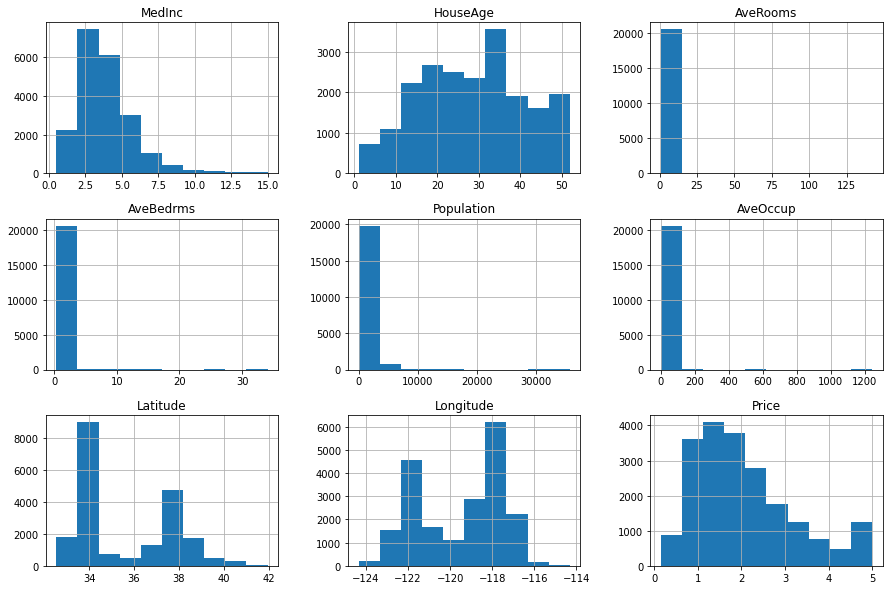

In [10]:
# create histogram of all the numeric attributes of the dataframe
# This is done using df.hist(), could also be done using matplotlib
df.hist(figsize=(15,10), bins = 10)

The median income does not seem to be true representative of the dollar value of the income. It has already been preprocessed to scale between a range of values (we can see min and max from df.describe for reference). Also, the target variable Price has also been scaled in the provided data.

### Train-test split
Don't do any further analysis before taking out the test set to prevent 'data snooping' bias. Your brain may catch any existing patterns in the data that may influence your choice of the machine learning models to make predictions.
So, take the test data and keep it aside!

Typically pick 20% random instances from the original dataset as your test set (or less if the dataset is quite large which in not the case here).

In [11]:
# we can use sklearn train_test_split but here we are defining our own function to do the train-test split
np.random.seed(42) # define a seed so that every time the function is called, same test set is generated
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
# call the function to get train_set and test_set
train_set, test_set = split_train_test(df,0.2)

In [13]:
# a simple example to understand what has been done in the function split_train_test()
ind = np.random.permutation(10)
print(ind)
test_ind = ind[:2]
print(test_ind)
train_ind = ind[2:]
print(train_ind)

[6 0 8 1 9 7 3 5 4 2]
[6 0]
[8 1 9 7 3 5 4 2]


In [14]:
# same thing using scikit-learn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

So far we have only done the train-test split on purely random basis and it is preferred when the data is large enough relative to number of attributes. If this is not the case then there is a risk of *sampling bias*.

#### To prevent sampling bias, we can use something called Stratified Sampling instead of random sampling of the test set. 
The population is divided into homogeneous groups called 'strata', and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population. We can use sklearn's StratifiedShuffleSplit in such cases wherever needed. 

## Data visualization

In [15]:
#we can create a copy of the train set to do some more exploration
df = train_set.copy()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

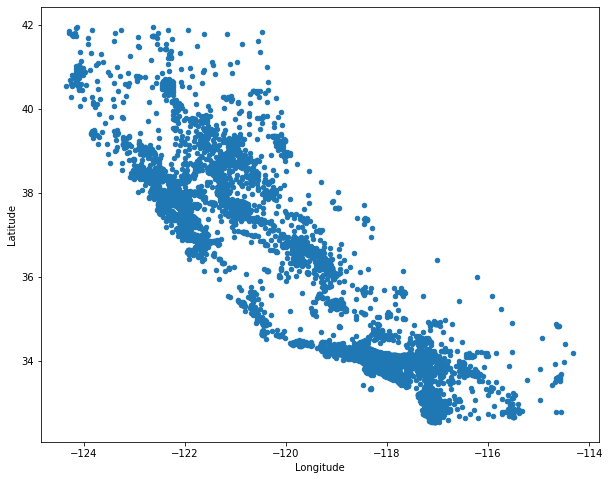

In [27]:
df.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(10,8))

It looks like a geographical map of California, but it is hard to see any particular pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points.

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

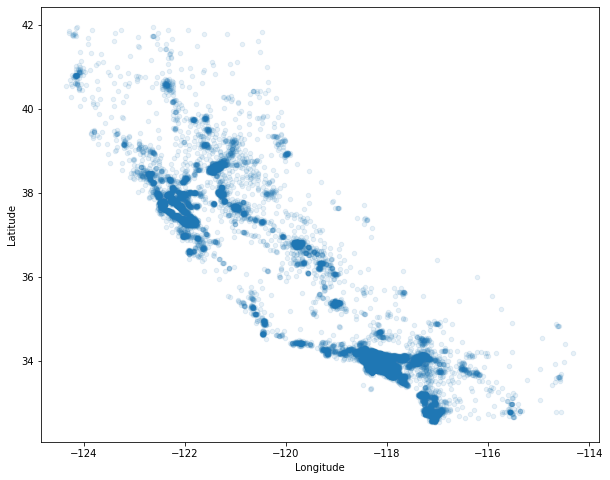

In [28]:
df.plot(kind='scatter', x='Longitude', y='Latitude', alpha = 0.1, figsize=(10,8))

To see more patterns based on other parameters, we can tweak the above plot as follows.
Set the radius of the scatterplot points according to the population column by specifying it in 's' parameter.
'c' parameter contains the values conditioned on which the color of the points is decided.

- The radius of the circle represents the district's population (option s)
- The color represents the price (option c)
- colormap used is 'jet' which ranges from blue (low prices) to red (high prices).

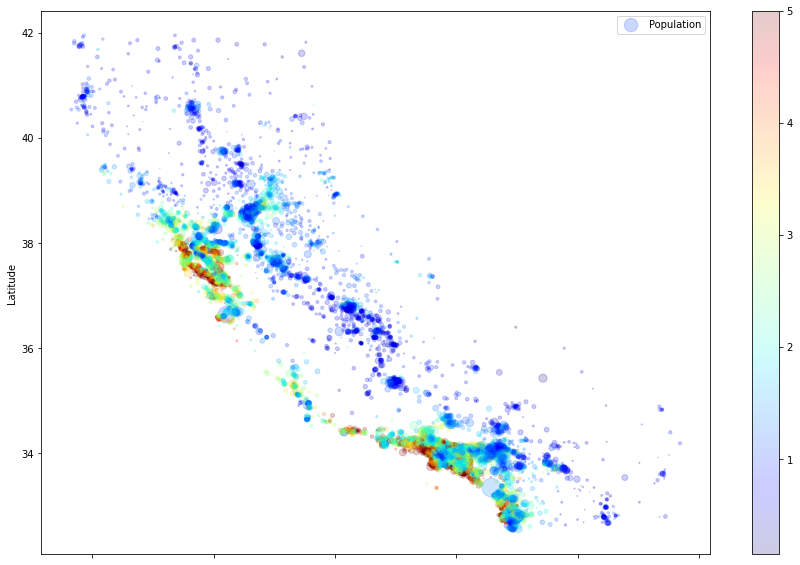

In [30]:
df.plot(kind='scatter',x='Longitude', y='Latitude', alpha=0.2, s=df['Population']/100, label = 'Population',
       figsize=(15,10), c=df['Price'], cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()